random forest variance formula - variance of mean of p correlated variables

$p*\sigma^2 + \frac{1 - p}{\beta} \sigma^2$

[generating correlated random variables](https://math.stackexchange.com/questions/446093/generate-correlated-normal-random-variables)

In [30]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [19]:
mu = np.array([3, 9])
sigma = np.array([[3, 1], [1, 3]])

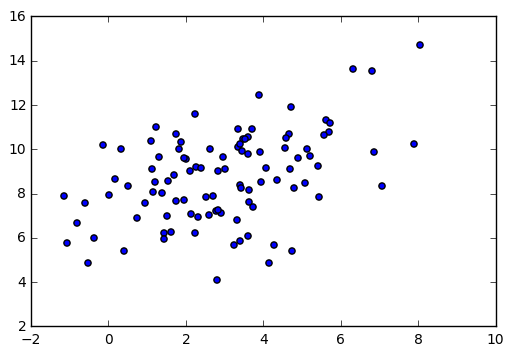

In [20]:
sims = np.random.multivariate_normal(mu, sigma, 100)
plt.scatter(sims[:,0], sims[:,1])

In [23]:
C = np.linalg.cholesky(sigma)
print sigma
print C
print C.dot(C.T)

[[3 1]
 [1 3]]
[[ 1.73205081  0.        ]
 [ 0.57735027  1.63299316]]
[[ 3.  1.]
 [ 1.  3.]]


### correlated data generation
* to generate $Y \sim N(\mu, \Sigma)$
* 1. generate a vector of uncorrelated Gaussian random variables, Z
* 2. find the root of $\Sigma$, so that $CC^T = \Sigma$
* the target vector is given by $Y = \mu + CZ$

### simpler in 2d
* generate X1, X2
* $X_3 = \rho X_1 + \sqrt{1 - \rho^2} X_2$
* $Y_1 = \mu + \sigma_1 X_1$, $Y_2 = \mu + \sigma_2 X_3$
* cor($Y_1$, $Y_2$) = $\rho$

In [34]:
rho = 0.3
sigma_1 = 10
sigma_2 = 3
X1 = np.random.normal(0, sigma_1, 1000)
X2 = np.random.normal(0, sigma_2, 1000)
X3 = rho * X1 + np.sqrt(1 - rho * rho) * X2
Y1 = 13 + sigma_1 * X1
Y2 = 13 + sigma_2 * X3
print pearsonr(Y1, Y2)

(0.71612600584290376, 4.9725674689604089e-158)


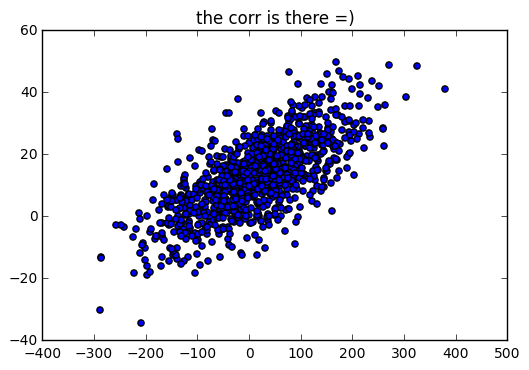

In [38]:
plt.scatter(Y1, Y2)
plt.title("the corr is there =)")

# k.. this is going nowhere =)